<p> There is a game where the gate opens at level 30 and gives many privileges to players. The game company wants to change the level 30 to level 40 for that gate. The game company wants to test if the change in gate position would affect the retentivity of players or not. As it is very important for a game company to earn money by improving players retentivity<p>
    
<p>The retentin is measured over 14 days of installation of game<p>
<p>There are 2 retentivity days, 1 day, 7-days<p>
<p>Since the data is less, we need to resample the data<p>
<p>Understand the retentivity by plotting the distributin foor 1 day retention for both versins f the game and we find the difference if present, Similarly, we can analyse this fr  7 day retention<p>
<p>The 7-day retentivity helps analyse the gate position,as after a week many players can reach the level of the gate.! day retentivity analysis does not give much idea about it. The afetr 7 days, the difference in retentivity  for both versiuons A-B of game can help us to decide whether we should position the gate at level 30 or at 40 level<p>
    
<p>This is a *statistical analysis* over A-B test<p>

<p><a href = "https://www.youtube.com/watch?v=nwY6GBrp-Og" ><img src="https://pbs.twimg.com/profile_images/834012013659615232/HPlUGQ9g_400x400.jpg" style="width: 300px"></a><p><p>We are going to analyse the game retention now<p>

###### 1. Importing library and packages

In [1]:
# Importing pandas
import pandas as pd
# Reading in the data
df = pd.read_csv('datasets/cookie_cats.csv')

# Showing the first few rows
df.head()
# Importing pandas
import pandas as pd
# Reading in the data
df = pd.read_csv('datasets/cookie_cats.csv')

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


###### 2. Understanding Data

The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

* userid - a unique number that identifies each player.
* version - whether the player was put in the control group (gate_30 - a gate at level 30) or
the group with the moved gate (gate_40 - a gate at level 40).
* sum_gamerounds - the number of game rounds played by the player during the first 14 days after install.
* retention_1 - did the player come back and play 1 day after installing?
*retention_7 - did the player come back and play 7 days after installing?
<p>When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40. As a sanity check, let's see if there are roughly the same number of players in each AB group.<p>

In [2]:
# Counting the number of players in each AB group.
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

###### 3. The distribution of game rounds

It looks like there is roughly the same number of players in each group

The focus of this analysis will be on how the gate placement affects player retention, 

Let's plot the distribution of the number of game rounds players played during their first week playing the game.

Text(0, 0.5, 'userid')

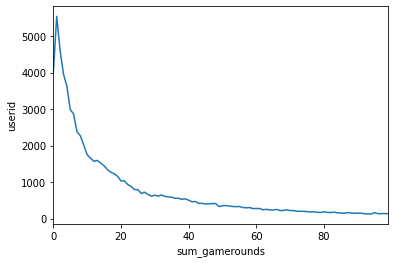

In [3]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby("sum_gamerounds").count()['userid']

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot()
ax.set_xlabel("sum_gamerounds")
ax.set_ylabel("userid")

###### 4. Overall 1-day retention

we can see that some players install the game but then never play it (0 game rounds), some players just play a couple of game rounds in their first week, and some get really hooked

What we want is for players to like the game and to get hooked. A common metric in the video gaming industry for how fun and engaging a game is 1-day retention: The percentage of players that comes back and plays the game one day after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.

As a first step, let's have a look at what 1-day retention is overall.

In [4]:
# The % of users that came back the day after they installed
df[df['retention_1']==True].shape[0]/df.shape[0]*100 #retention_1/Total no.of rows in df

44.52095044850259

###### 5. 1-day retention by AB-group

So, a little less than half of the players come back one day after installing the game. Now that we have a benchmark, let's look at how 1-day retention differs between the two AB-groups.

In [5]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

It looks that there was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control when it was at level 30 (44.8%). 

It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 40 will be worse in the future?

There are a few  ways we can get at the certainty of these retention numbers.
<p> use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.<p>

###### 6. Should we be confident in the difference?

In [6]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(10000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)

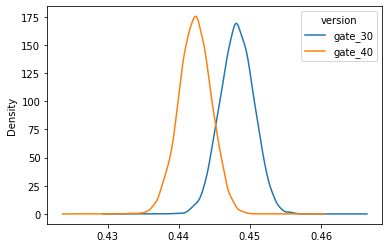

In [7]:
###### A Kernel Density Estimate plot of the bootstrap distributions

boot_1d.plot(kind='kde')


In [16]:
#boot_1d

version,gate_30,gate_40,diff
retention_1,0.450372,0.441458,2.019199
retention_1,0.454837,0.441208,3.088839
retention_1,0.446906,0.441922,1.127798
retention_1,0.450167,0.443492,1.505106
retention_1,0.445770,0.442309,0.782632
...,...,...,...
retention_1,0.450851,0.443338,1.694696
retention_1,0.449210,0.440301,2.023566
retention_1,0.446741,0.437898,2.019570
retention_1,0.449122,0.442975,1.387706


GAte 30 has high mean for retention

###### 7. Zooming in on the difference

These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. Just seeing  this plot, we can see that there seems to be some evidence of a difference, maybe small.

###### Let's zoom in on the difference in 1-day retention

Text(0.5, 0, '% difference in means')

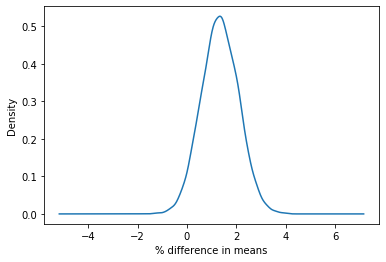

In [9]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) /  boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

###### 8. The probability of a difference

we can see that the most likely % difference is around 1% - 2%, and that most of the distribution is above 0%, in favor of a gate at level 30. 

But what is the probability that the difference is above 0%? Let's find it as well.

In [10]:
# Calculating the probability that 1-day retention 
# is greater when the gate is at level 30.
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d)

In [11]:
### printing the probability
print('{:.1%}'.format(prob))# probability of the game difference is above 0 i.e, in favour of game withh gate at level 30

96.4%


###### 9. 7-day retention by AB-group

The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the gate is at level 30. However, since players have only been playing the game for one day, it is likely that most players haven't reached level 30 yet. That is, many players won't have been affected by the gate, even if it's as early as level 30.

But after having played for a week, more players should have reached level 40, and therefore it makes sense to 

Have look at 7-day retention. That is: What percentage of the people that installed the game also showed up a week later to play the game again.

###### Let's start by calculating 7-day retention for the two AB-groups.

In [17]:
# Calculating 7-day retention for both AB-groups
df.groupby('version')['retention_7'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.190201
gate_40    0.182000
dtype: float64

In [18]:
# Calculating 1-day retention for both AB-groups
df.groupby('version')['retention_1'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

###### 10. Bootstrapping the difference again

Like with 1-day retention, we see that 7-day retention is slightly lower (18.2%) when the gate is at level 40 than when the gate is at level 30 (19.0%). This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate. We also see that the overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing.

But as before, let's use bootstrap analysis to figure out how certain we should be for difference between the AB-groups.

In [13]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(10000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) /  boot_7d['gate_30'] * 100

Text(0.5, 0, '% difference in means')

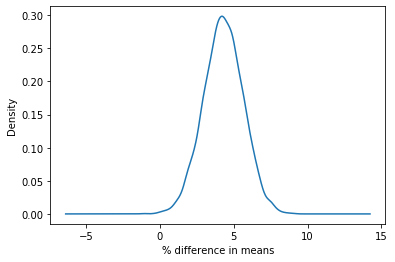

In [14]:
# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

In [15]:
# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d)

# Pretty printing the probability
print('{:.1%}'.format(prob))

99.9%


###### The conclusion

The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40.

The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40. There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. **But retention is one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.**